# Loading a File via URL

This notebook contains instructions for how to load a file into Python using a url. You can view the text file [here](https://gist.githubusercontent.com/reuven/5660728/raw/ff8cfe2d80f15b6569c9cf2644163f00105d8612/test-file.txt). 

Why do we have blank items in our *list*? How would you modify our list "data" to eliminate these?

In [29]:
!pip install wget #this may or may not be necessary to use each time
import wget #load a program to access URLs
import pandas as pd
from matplotlib import pyplot as plt 
%matplotlib inline 
import seaborn as sns

url = "https://raw.githubusercontent.com/hutch-gwc/science_fair/master/data/secondary_structure/H1_dms.csv" # insert your text file URL here
filename = wget.download(url)

# we use "with open()" to tell the computer to open the file, read the lines, and then automatically close the file
# this helps to prevent bugs (like reading a file you don't mean to because it was left "open") and reduce memory usage 
with open(filename) as file: 
        # this is a "list comprehension", which is essentialy a for loop in shorthand
        # you can learn more here: https://www.pythonforbeginners.com/basics/list-comprehensions-in-python
        data = pd.read_csv(file) # [line.strip() for line in file.readlines()] 
        
print(data)
data = data.set_index('site')

     site         A         C         D         E         F         G  \
0       1  0.032454  0.073960  0.009216  0.021619  0.077829  0.021621   
1       2  0.086359  0.031263  0.048741  0.028882  0.053238  0.010673   
2       3  0.096189  0.050788  0.015378  0.032307  0.032361  0.030145   
3       4  0.122962  0.099275  0.018363  0.027358  0.145970  0.019761   
4       5  0.041901  0.036225  0.023225  0.013660  0.137127  0.009173   
5       6  0.035979  0.095094  0.011068  0.030733  0.095910  0.011017   
6       7  0.041937  0.035679  0.009215  0.012444  0.155274  0.017994   
7       8  0.011222  0.103127  0.011412  0.013134  0.062530  0.091937   
8       9  0.057686  0.073147  0.011966  0.008727  0.151523  0.015626   
9      10  0.079399  0.053472  0.010191  0.028627  0.120685  0.023897   
10     11  0.064133  0.101396  0.013028  0.009212  0.108575  0.087719   
11     12  0.076792  0.036628  0.018641  0.096782  0.030587  0.022739   
12     13  0.155998  0.056983  0.029735  0.068735  

In [28]:
data1 = data.max(axis=1)
my_dict = {"site":[], "value":[], "amino":[]} # create exel type data 
#print(data1)
#for x in data1:
 # print(x)
for i, v in data1.items(): 
  #print(data.loc[i].idxmax())
  data3 = data.loc[i]
  

  my_dict['site'].append(i)
  my_dict['value'].append(data3.max())
  my_dict['amino'].append(data3.idxmax())
  
final = pd.DataFrame(my_dict) #framing 
print(final)

    amino  site     value
0       T     1  0.106143
1       L     2  0.133778
2       A     3  0.096189
3       F     4  0.145970
4       L     5  0.140285
5       L     6  0.128355
6       L     7  0.242499
7       L     8  0.167179
8       F     9  0.151523
9       F    10  0.120685
10      V    11  0.112948
11      V    12  0.183903
12      A    13  0.155998
13      T    14  0.194181
14      D    15  0.172382
15      A    16  0.369945
16      D    17  0.371546
17      L    18  0.139039
18      I    19  0.368715
19      C    20  0.473179
20      I    21  0.397645
21      G    22  0.470028
22      Y    23  0.323015
23      H    24  0.242704
24      A    25  0.328863
25      N    26  0.506552
26      N    27  0.456923
27      S    28  0.359418
28      T    29  0.379115
29      D    30  0.316146
..    ...   ...       ...
522     V   523  0.288844
523     A   524  0.435628
524     S   525  0.265429
525     S   526  0.386918
526     L   527  0.143857
527     I   528  0.187470
528     L   

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


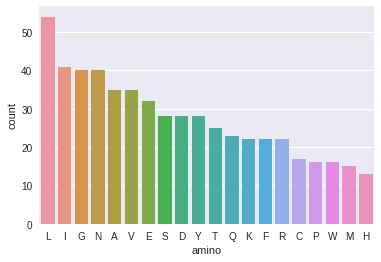

In [32]:
# create chart to go in order from most common amino acid to least common amino acid 
sns.countplot(x='amino', data=final,
             order = final['amino'].value_counts().index)